In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as stattools
import math

In [4]:
df = pd.read_csv("prices.txt", sep='\s+', header=None, index_col=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13.845620,69.033740,47.262580,48.004780,55.496120,11.740700,18.177200,46.78280,68.537300,50.185100,34.991280,26.655480,26.612000,48.495040,14.771680,25.024020,35.250140,45.085580,13.722540,30.998020,64.693420,22.441040,67.554900,29.657560,63.297620,54.631960,59.677860,28.912860,51.157980,31.243220,13.47922,66.989140,54.523960,42.464860,24.871520,67.157960,36.170500,38.824320,21.555520,49.217540,31.651400,63.251640,12.502360,60.843540,36.523580,52.461460,57.537160,34.427360,41.273040,56.123620
std,0.748745,3.908187,0.614438,2.051494,1.733916,0.635884,0.299771,1.26656,0.585843,3.207362,3.131639,2.474173,0.568065,1.926971,0.816203,1.168601,0.432054,0.461566,0.697558,2.364453,5.786328,0.551776,2.474041,1.561321,0.846638,9.948234,4.129548,0.495184,0.385329,0.784868,0.76818,2.217278,2.104382,2.651298,1.863077,10.173995,2.961439,1.893897,0.255924,0.231602,0.771223,7.833634,0.940225,1.898022,1.561982,0.756214,4.548284,0.878169,3.814908,1.178059
min,12.630000,62.470000,46.330000,44.900000,51.660000,10.020000,17.650000,44.01000,67.260000,45.260000,29.910000,22.310000,25.530000,43.050000,12.910000,22.290000,34.320000,43.970000,12.090000,26.190000,53.640000,21.090000,60.170000,25.730000,60.910000,38.370000,50.810000,27.910000,49.950000,29.400000,11.85000,61.860000,50.300000,38.050000,22.280000,50.970000,31.490000,33.880000,20.700000,48.560000,30.270000,50.620000,10.630000,56.260000,31.760000,50.210000,49.200000,32.800000,31.640000,53.470000
25%,13.207500,65.517500,46.820000,45.750000,54.000000,11.480000,17.970000,45.91750,68.110000,47.597500,32.097500,24.830000,26.187500,47.840000,14.317500,24.277500,34.927500,44.810000,13.260000,29.100000,59.755000,21.907500,66.137500,28.760000,62.870000,45.227500,56.730000,28.640000,50.880000,30.650000,12.89500,65.450000,52.915000,40.447500,23.300000,55.560000,33.507500,37.820000,21.497500,49.087500,30.950000,55.865000,11.817500,59.420000,35.837500,52.050000,54.062500,33.800000,39.615000,55.317500
50%,13.590000,68.255000,46.975000,47.830000,55.880000,11.850000,18.100000,46.69000,68.550000,49.535000,34.280000,26.080000,26.590000,48.945000,14.740000,25.330000,35.200000,45.075000,13.960000,30.580000,65.200000,22.610000,67.725000,29.615000,63.360000,54.065000,59.010000,28.870000,51.200000,31.440000,13.48000,66.925000,54.410000,41.625000,24.455000,72.400000,35.920000,39.025000,21.610000,49.230000,31.590000,64.615000,12.210000,60.750000,36.825000,52.375000,55.425000,34.350000,41.665000,56.100000
75%,14.582500,72.915000,47.800000,50.380000,56.720000,12.210000,18.410000,47.50250,68.912500,52.192500,38.172500,27.945000,27.050000,49.750000,15.120000,25.832500,35.512500,45.380000,14.270000,32.890000,69.802500,22.910000,69.450000,30.900000,63.860000,64.855000,62.780000,29.200000,51.442500,31.820000,13.91250,69.067500,56.252500,43.905000,26.872500,76.102500,38.592500,40.177500,21.700000,49.380000,32.302500,70.352500,13.232500,62.107500,37.602500,52.892500,61.855000,35.032500,43.525000,57.002500
max,15.560000,75.150000,48.610000,51.010000,59.120000,13.000000,18.980000,51.09000,69.990000,59.100000,40.640000,33.530000,27.610000,51.420000,16.980000,27.230000,36.240000,46.130000,14.750000,35.470000,73.680000,23.340000,72.210000,32.770000,64.970000,71.090000,69.190000,29.960000,52.110000,32.610000,15.35000,70.850000,59.120000,48.980000

In [5]:
matrix = df.corr()
matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.484861,-0.000323,0.342298,0.317748,0.310771,0.066857,0.158233,-0.552252,-0.447394,0.579023,-0.111152,0.224911,0.520946,0.108385,0.184398,-0.038563,-0.029847,0.452437,0.585026,-0.231680,-0.183276,-0.308122,-0.075082,-0.347139,-0.428328,-0.199546,0.149615,-0.376405,0.624325,0.523913,-0.195601,0.082020,-0.392588,0.184806,-0.167093,-0.334962,0.008454,0.272854,-0.217442,0.315695,-0.388165,0.010505,-0.590003,0.020916,0.489821,-0.547067,-0.596600,0.222497,-0.247700
1,0.484861,1.000000,0.711375,0.887782,-0.248500,0.312233,0.479015,0.063246,-0.325255,-0.511915,0.919322,0.631455,0.780806,0.390503,0.484387,-0.667219,0.641284,0.472971,0.746674,0.357307,-0.832888,0.427709,-0.131103,0.453565,-0.227354,-0.864585,-0.552084,0.683614,-0.451868,0.644155,0.662713,-0.665906,-0.219549,0.351229,0.827250,-0.855757,-0.714125,-0.638000,0.369343,-0.249452,0.794773,-0.859488,0.708851,-0.347945,0.206459,0.618185,-0.739845,0.094219,0.225338,-0.140404
2,-0.000323,0.711375,1.000000,0.886664,-0.303549,0.468646,0.702281,-0.148973,-0.029862,-0.521895,0.577658,0.930262,0.876416,0.444673,0.796399,-0.822081,0.931731,0.714029,0.771231,0.304222,-0.899283,0.438694,0.009458,0.786200,0.217494,-0.856630,-0.765009,0.929081,-0.058008,0.575009,0.592136,-0.807407,0.084341,0.849823,0.954538,-0.908084,-0.813153,-0.619578,0.628192,0.240274,0.816023,-0.836914,0.946771,-0.102320,0.572893,0.509319,-0.705855,0.658741,0.530097,0.170426
3,0.342298,0.887782,0.886664,1.000000,-0.161168,0.508628,0.741260,-0.053210,-0.287254,-0.636161,0.794527,0.809162,0.927748,0.579175,0.724116,-0.720622,0.773157,0.573251,0.916689,0.480459,-0.919513,0.324192,-0.208895,0.749586,-0.013414,-0.965028,-0.632850,0.907476,-0.246015,0.731434,0.704059,-0.852426,0.032613,0.633276,0.936308,-0.883600,-0.890407,-0.630624,0.601248,-0.015005,0.920745,-0.954218,0.902854,-0.331218,0.448414,0.680553,-0.873891,0.286249,0.554721,0.038340
4,0.317748,-0.248500,-0.303549,-0.161168,1.000000,0.421530,-0.176451,-0.298372,-0.146141,-0.374560,-0.108684,-0.335717,-0.109982,0.527073,-0.088856,0.595805,-0.304493,-0.189750,0.170795,0.269471,0.360551,-0.732739,0.013663,0.100712,0.445474,0.149327,0.165654,-0.110266,0.277070,0.190491,0.047501,0.168332,0.300432,-0.283376,-0.304752,0.380675,-0.144264,0.509433,0.325273,0.275588,-0.158876,0.039312,-0.275589,-0.195832,0.308917,0.327946,-0.028159,-0.436382,0.309562,0.446233
5,0.310771,0.312233,0.468646,0.508628,0.421530,1.000000,0.511504,-0.131503,-0.082759,-0.618745,0.342593,0.454462,0.599502,0.661217,0.744612,-0.105237,0.489918,0.231741,0.709871,0.748986,-0.437533,-0.336908,-0.252921,0.562675,0.331067,-0.581841,-0.516762,0.690256,0.197570,0.797638,0.744199,-0.589132,0.648903,0.363827,0.464844,-0.303102,-0.657668,0.037732,0.889289,0.620525,0.464680,-0.511109,0.508297,-0.488032,0.751183,0.398783,-0.705058,0.111846,0.807994,0.389717
6,0.066857,0.479015,0.702281,0.741260,-0.176451,0.511504,1.000000,0.150450,-0.182146,-0.505333,0.321043,0.680576,0.757374,0.462431,0.724386,-0.495995,0.567415,0.305912,0.741009,0.544280,-0.668674,0.041726,-0.442933,0.741655,0.013829,-0.752316,-0.377904,0.826929,0.025607,0.609028,0.514142,-0.791098,0.418307,0.674574,0.664249,-0.507602,-0.643558,-0.425035,0.586548,0.210879,0.707649,-0.621149,0.778895,-0.300456,0.411076,0.375337,-0.776602,0.322419,0.745261,0.047916
7,0.158233,0.063246,-0.148973,-0.053210,-0.298372,-0.131503,0.150450,1.000000,-0.082670,0.179650,-0.004332,-0.194928,-0.031180,-0.303365,-0.064418,0.011849,-0.200173,-0.380738,-0.119324,0.167613,-0.007526,-0.008715,-0.331900,-0.269744,-0.584159,-0.040061,0.214415,-0.080225,-0.124456,0.031080,0.042400,-0.061762,0.182422,-0.171437,-0.112381,0.113806,0.201313,0.141729,-0.200206,-0.202911,0.045617,0.176603,-0.109471,-0.100130,-0.392406,-0.288954,-0.074789,-0.221890,-0.059946,-0.427736
8,-0.552252,-0.325255,-0.029862,-0.287254,-0.146141,-0.082759,-0.182146,-0.0

In [14]:
# Get the cointegration matrix of p-value
coint_matrix = [[0] * 50 for i in range(50)]
for i in range(50):
    for j in range(50):
        if i == j:
            coint_matrix[i][j] = 0
            continue
        coint_matrix[i][j] = stattools.coint(df[i], df[j])[1]

coint_matrix

[[0,
  0.6517472509067221,
  0.8358541101582462,
  0.7436061070335246,
  0.7762466563100268,
  0.6884043775600289,
  0.8193540563695743,
  0.7873285315978358,
  0.514061857612444,
  0.6866830242964568,
  0.7010309413768768,
  0.8512950723181245,
  0.7864903391103022,
  0.6403258373166875,
  0.8480048537841873,
  0.8800212093096393,
  0.8437838360135083,
  0.8412888734199512,
  0.7112832625313577,
  0.4506015728588793,
  0.8285880731728051,
  0.8174761836528992,
  0.8138799251136639,
  0.8520022767487149,
  0.8860912045543583,
  0.6492445208092185,
  0.8244453910220017,
  0.7910467747289027,
  0.6172543729682217,
  0.5498056155845402,
  0.32050221875776863,
  0.8188122691823356,
  0.8151475044206732,
  0.8572762890289253,
  0.7947013183295036,
  0.8047037820547674,
  0.7700035835642105,
  0.8363228505745541,
  0.7555048489874848,
  0.867830595966359,
  0.8145367392789613,
  0.7878993203460076,
  0.8331890052635964,
  0.0749524088429556,
  0.8319538097251841,
  0.714227983511315,
  0.457

In [28]:
coint_matrix[25][3]

0.04874898670038317

In [39]:
# Group the stocks with high cointegration together (Bad union-find, no size :D)
link = [i for i in range(50)] 
print(link)
def find(x):
    if (x == link[x]):
        return x
    link[x] = find(link[x])
    return link[x]

def merge(x, y):
    repX = find(x)
    repY = find(y)
    link[repY] = repX

groups = []
for i in range(50):
    minVal = 5
    minIndex = -1
    for j in range(50):
        if j == i:
            continue
        # Get the p-value
        val = coint_matrix[i][j]
        if val < minVal:
            minVal = val
            minIndex = j
    if minVal < 0.05:
        merge(i, minIndex)
    


# Get the representative from each group
reps = []
groups = {}
for i in range(len(link)):
    if link[i] == i:
        reps.append(i)
    
    repCur = find(i)
    if repCur not in groups:
        groups[repCur] = set()
    groups[repCur].add(i)
    


print(groups)
print(reps)
print(len(reps))
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
{43: {0, 43}, 1: {1, 10}, 2: {2, 11, 42}, 25: {25, 3}, 4: {4}, 5: {5, 38}, 31: {40, 12, 6, 31}, 7: {49, 7}, 8: {8, 46, 29, 30}, 9: {9, 13}, 14: {18, 27, 36, 14}, 15: {15}, 16: {16}, 17: {17}, 19: {19}, 20: {34, 20}, 21: {21}, 22: {24, 22}, 23: {23}, 26: {26}, 28: {28, 39}, 32: {32}, 33: {33}, 35: {35}, 37: {37}, 41: {41}, 44: {44}, 45: {45}, 47: {47}, 48: {48}}
[1, 2, 4, 5, 7, 8, 9, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 28, 31, 32, 33, 35, 37, 41, 43, 44, 45, 47, 48]
30


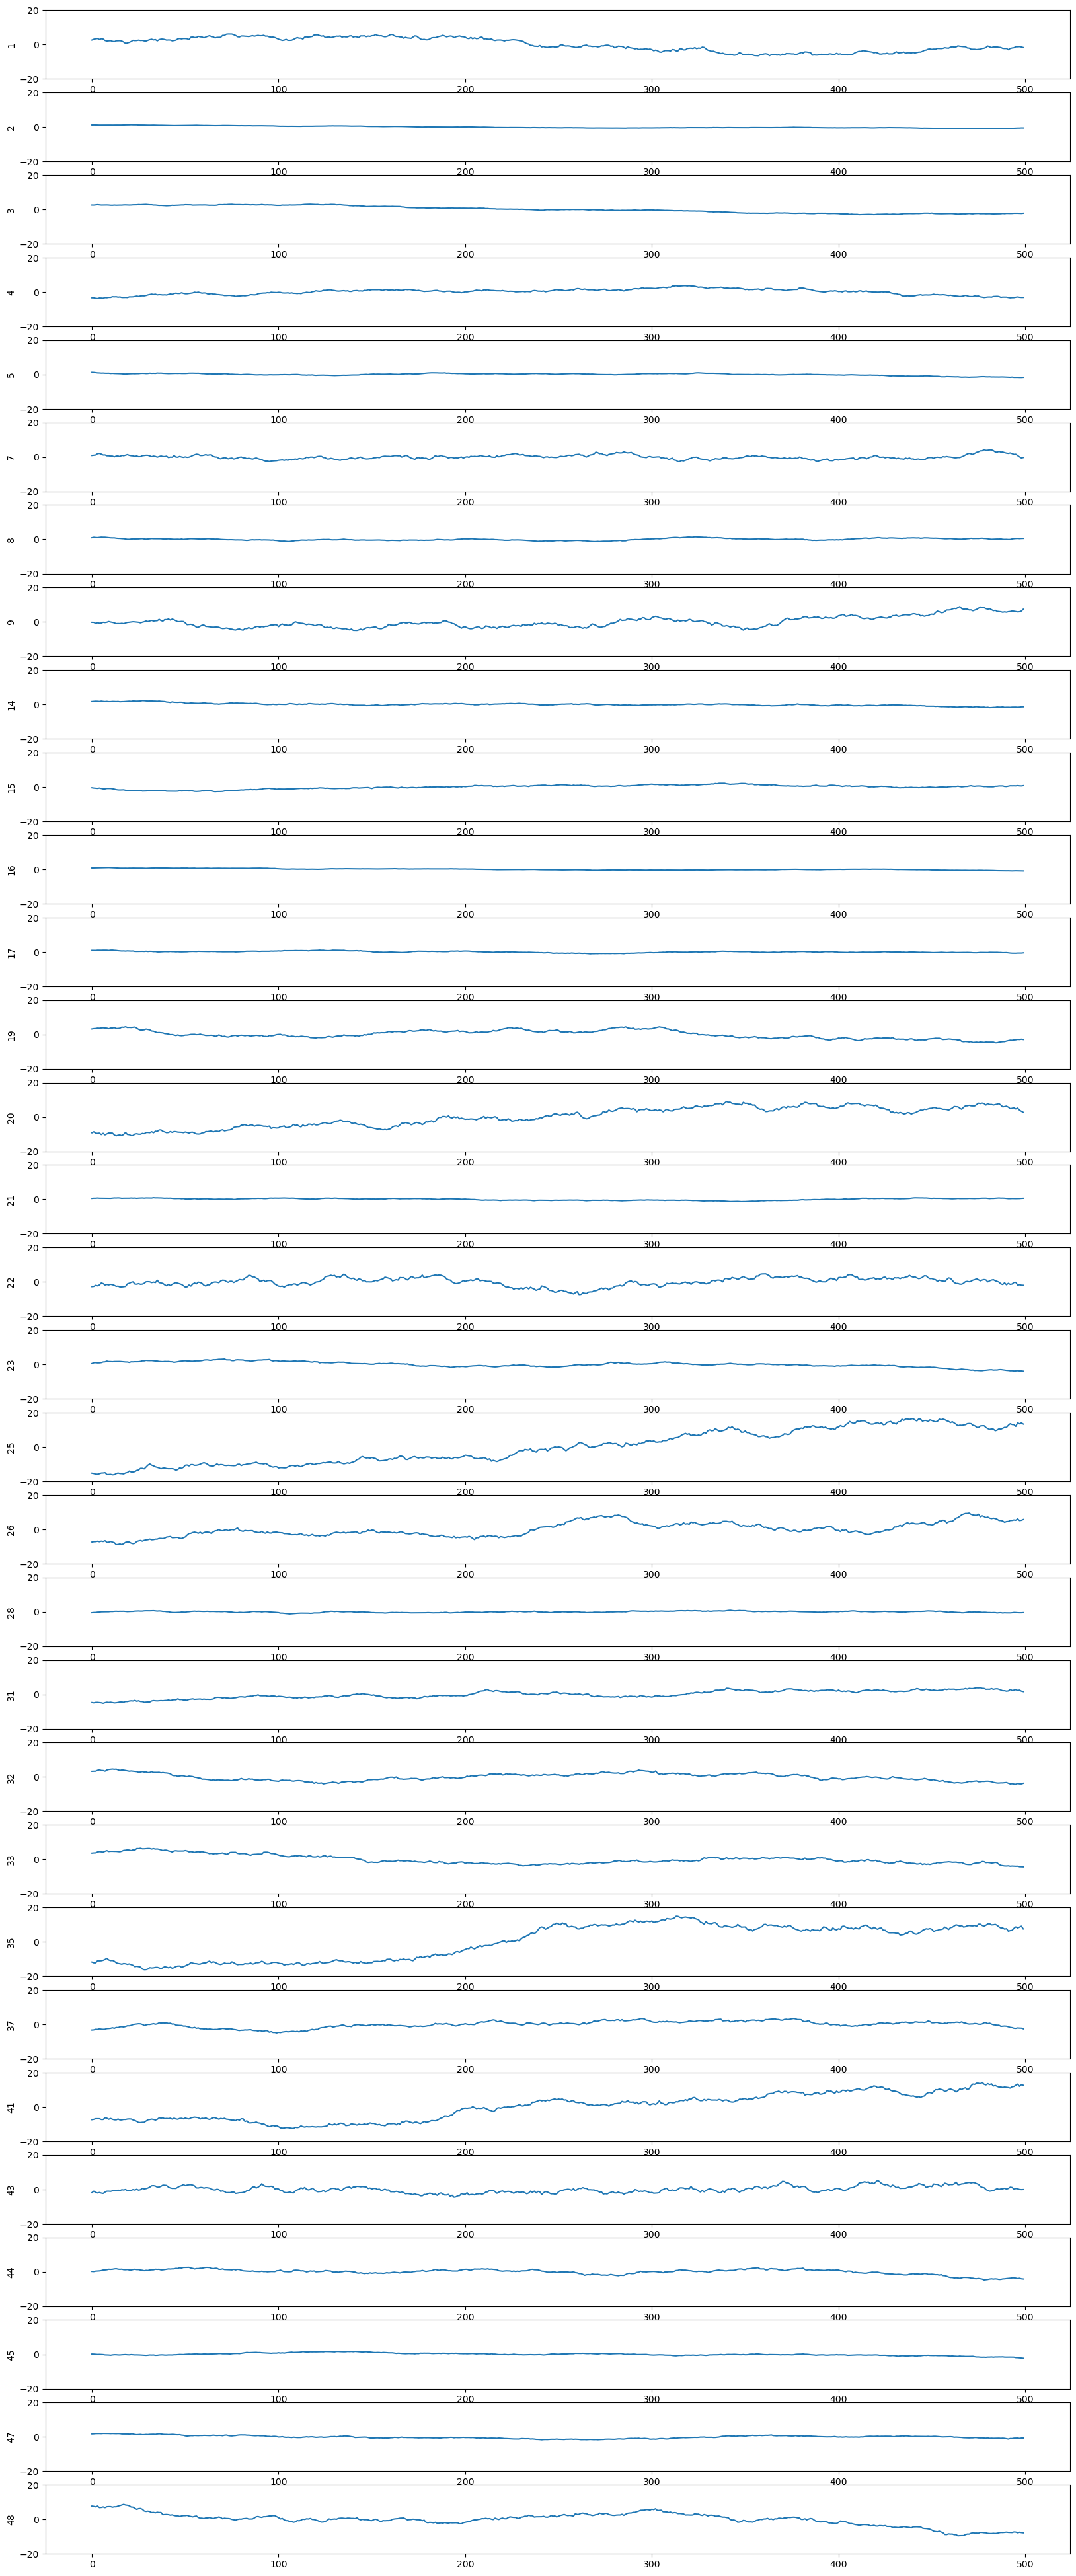

In [37]:
fig, axs = plt.subplots(len(reps), 1, figsize=(20, 50))

for i in range(len(reps)):
    sns.lineplot(df[reps[i]] - df[reps[i]].mean(), ax=axs[i])
    axs[i].set_ylim(-20, 20)

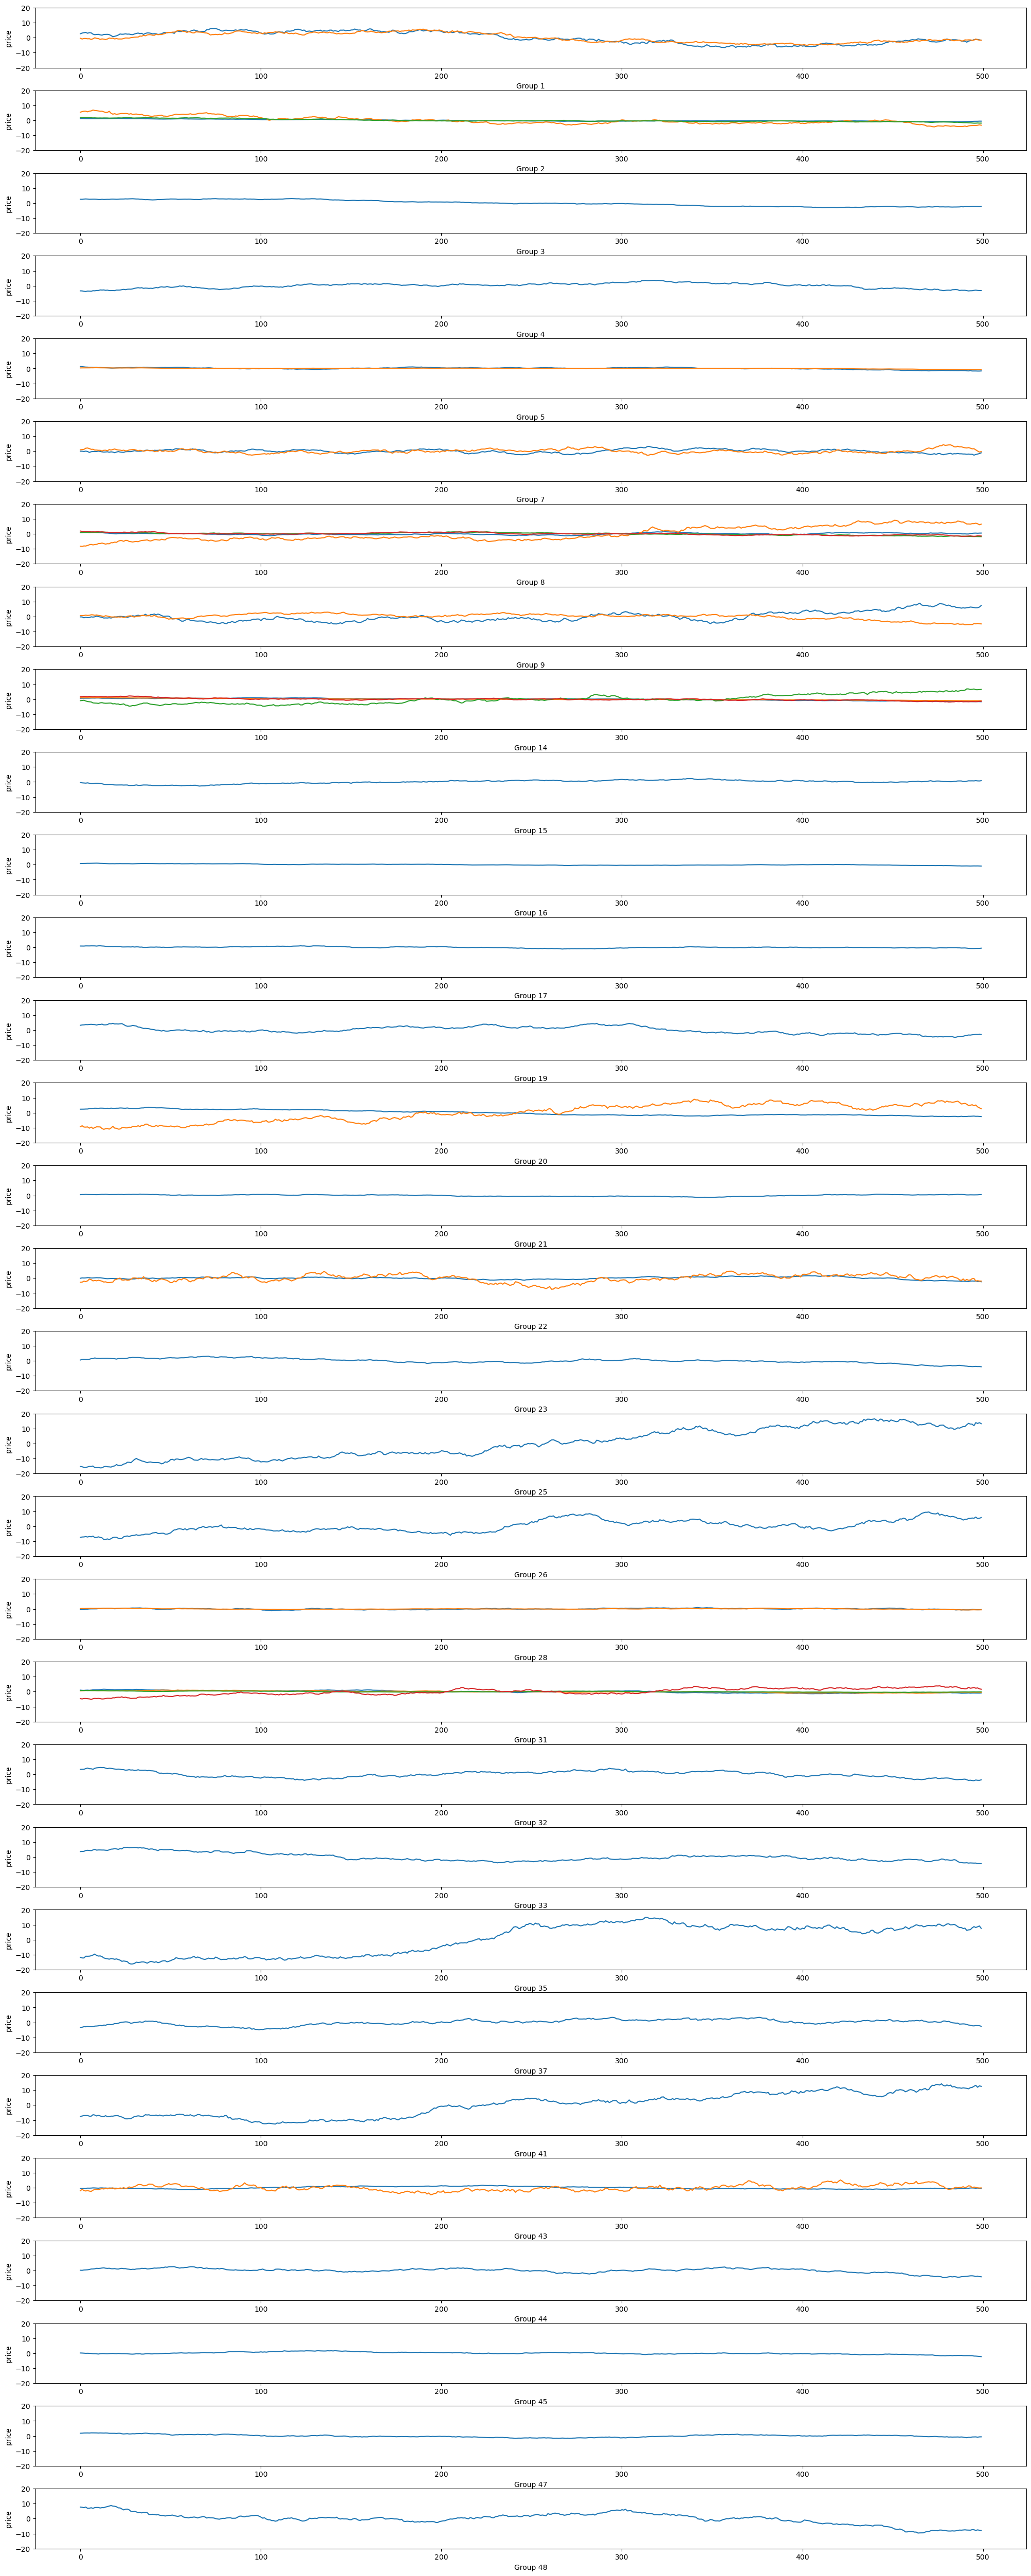

In [38]:
# Check the group rep
fig, axs = plt.subplots(len(reps), 1, figsize=(20, 50))
fig.tight_layout()

for i in range(len(reps)):
    for elem in groups[reps[i]]:
        sns.lineplot(df[elem] - df[elem].mean(), ax=axs[i])
    axs[i].set_ylim(-20, 20)
    axs[i].set(xlabel=f"Group {reps[i]}", ylabel="price")
    

In [63]:
# Group 4, 7: Linear Regression
model4 = sm.tsa.arima.ARIMA(endog=df[4], order=(6, 0, 0))
res4 = model4.fit()
print(res4.summary())

model7 = sm.tsa.arima.ARIMA(endog=df[7], order=(4, 0, 0))
res7 = model7.fit()
print(res7.summary())


                               SARIMAX Results                                
Dep. Variable:                      4   No. Observations:                  500
Model:                 ARIMA(6, 0, 0)   Log Likelihood                  36.347
Date:                Thu, 20 Jun 2024   AIC                            -56.693
Time:                        23:51:25   BIC                            -22.976
Sample:                             0   HQIC                           -43.463
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.2451      1.504     36.075      0.000      51.298      57.192
ar.L1          0.9875      0.050     19.632      0.000       0.889       1.086
ar.L2          0.0418      0.067      0.625      0.5